# Sparse Hebbian Learning: basics

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'quantization'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']

record_num_batches = 2**12
N_show = 120
ymin = .9
max_patches = 10
seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname='quantization')

In [5]:
!ls -l {shl.data_cache}/{tag}*

-rw-r--r--  1 laurentperrinet  staff    2564917 Mar  9 19:48 data_cache/quantization_HAP_dico.pkl
-rw-r--r--  1 laurentperrinet  staff    2564918 Mar  9 19:22 data_cache/quantization_None_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  231197024 Mar  9 21:31 data_cache/quantization_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65532, 441)
average of patches =  -3.539691684302017e-05  +/-  0.007141531008309743
average energy of data =  0.0876764136363373 +/- 0.05438969433954732


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (529, 441)
average of filters =  3.502283737392521e-06 +/- 0.002824075680415558
average energy of filters =  1.0 +/- 8.621398812004517e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (529, 441)
average of filters =  -2.6893935133067445e-05 +/- 0.003289175443698144
average energy of filters =  1.0 +/- 8.648382911827316e-17


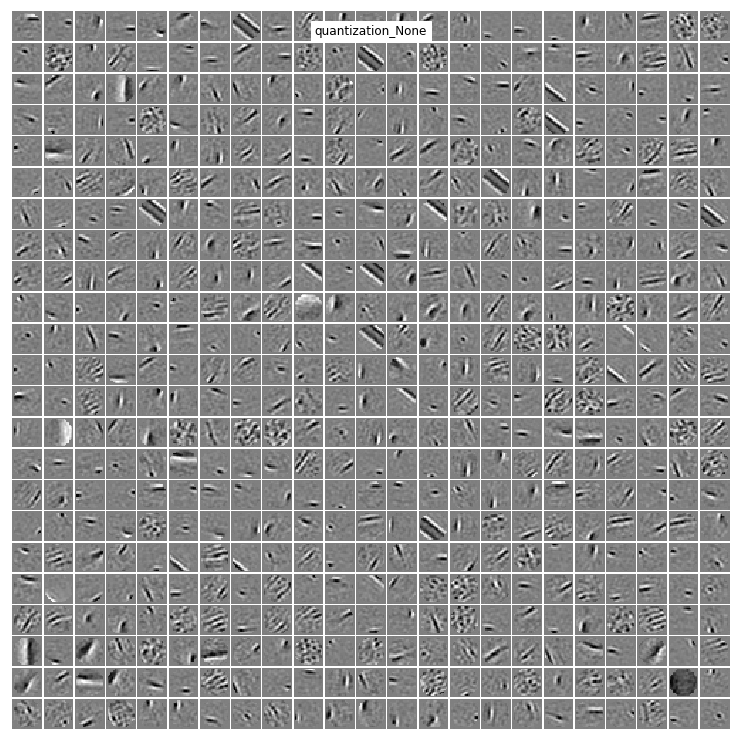

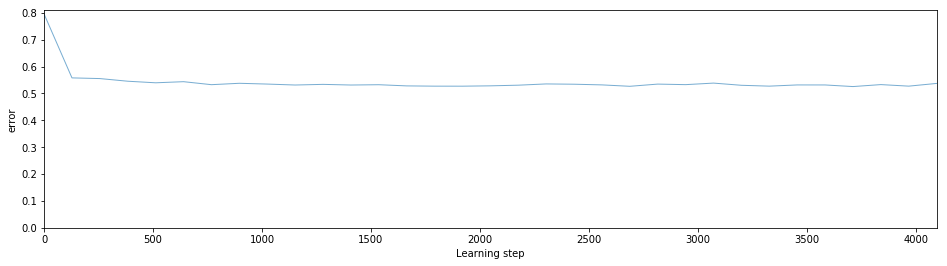

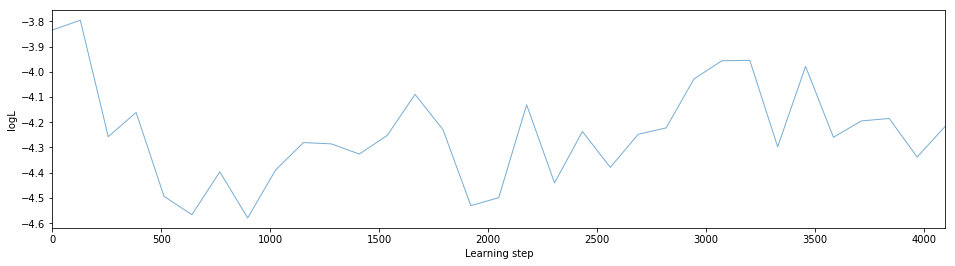

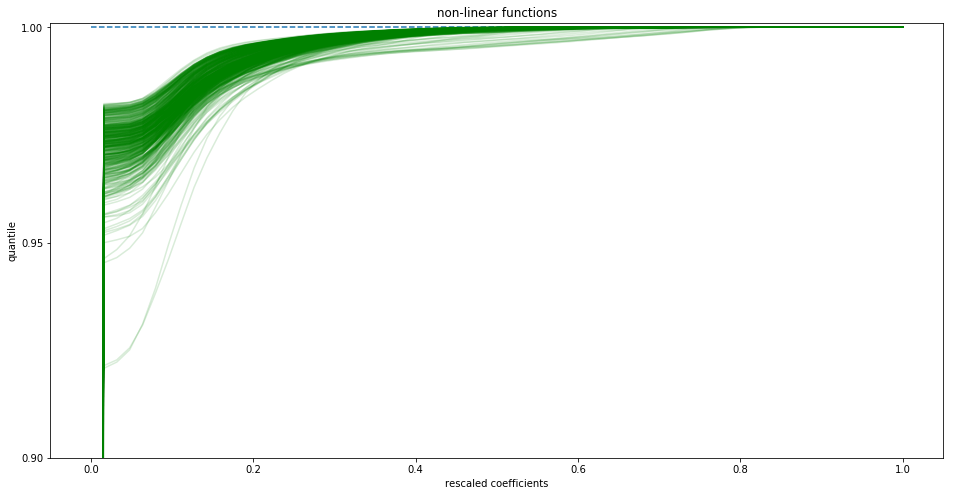

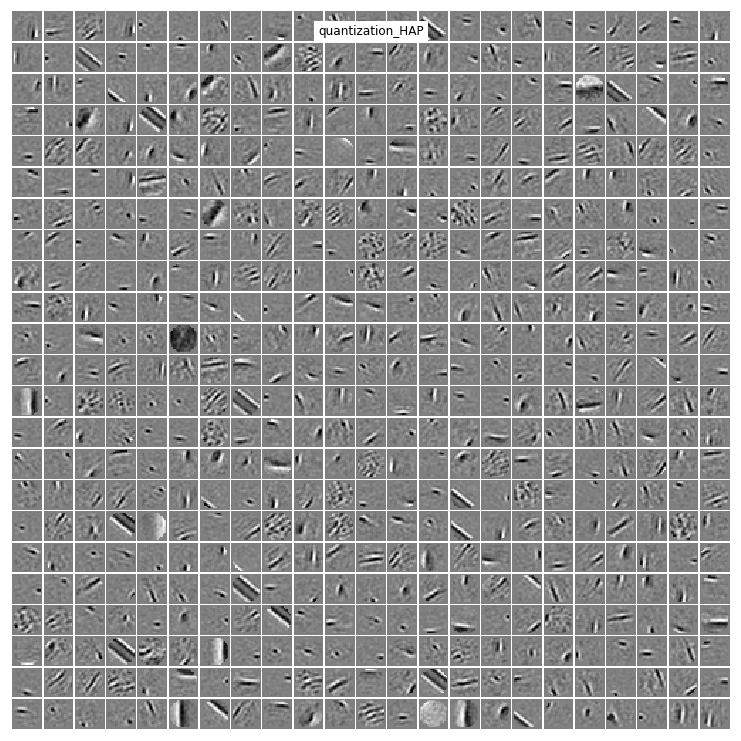

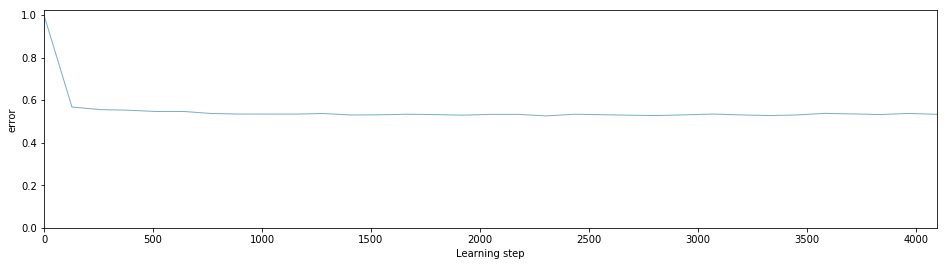

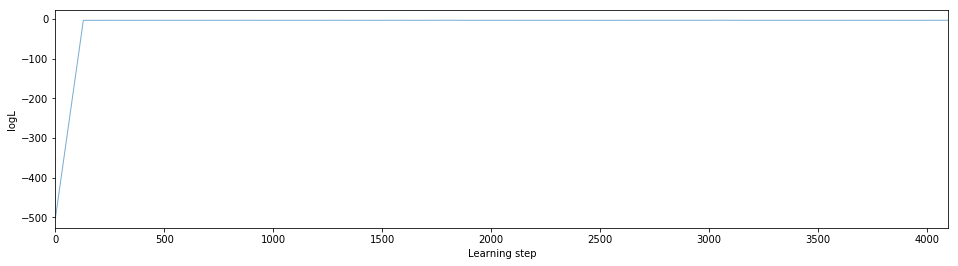

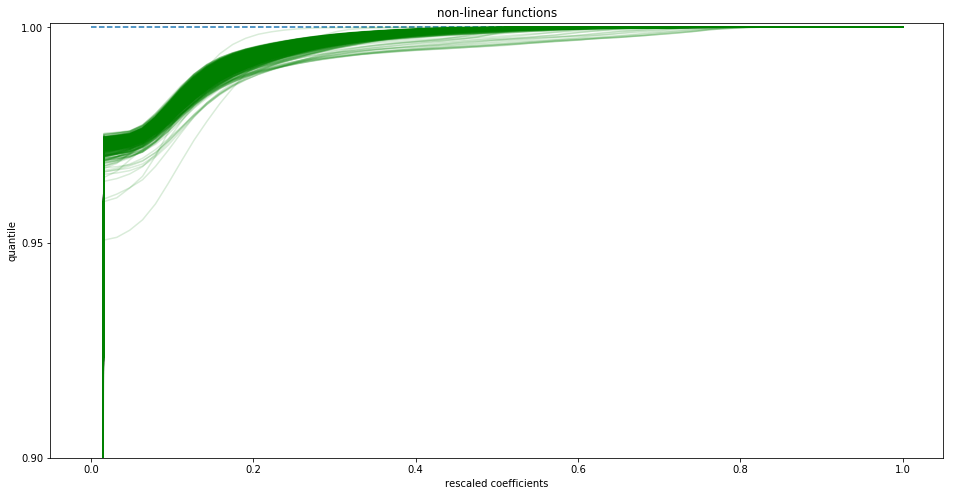

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.0105141297823758
l0-sparseness of codewords =  0.030112830812854444  ~= l0/M = 0.030245746691871456
average energy of codewords =  0.07188176028666751
std of the average of individual patches =  0.0057667332491114455
number of codes, size of reconstructed images =  (256, 441)


<Figure size 1080x216 with 0 Axes>

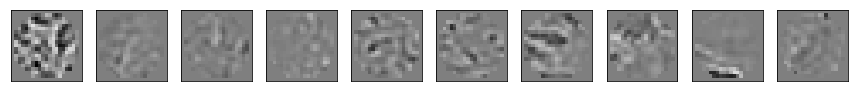

<Figure size 1080x216 with 0 Axes>

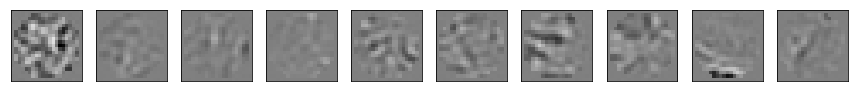

<Figure size 1080x216 with 0 Axes>

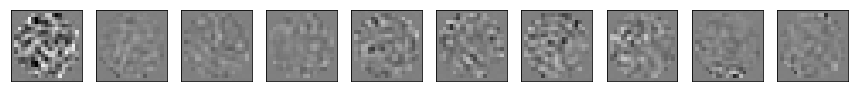

average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.0001724544144439611 +/- 0.003840242486067358
median energy of data =  0.07776151483188877
average energy of data =  0.08862101426382676 +/- 0.05467564162003357
average error =  -0.0001724544144439611 +/- 0.056052138065255594
average energy of residual =  0.04745059154173876 +/- 0.029838117979366696
median energy of residual =  0.04375441993809495
average gain of coding =  1.8966320207481764 +/- 0.45677261112186796
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.0105141297823758
l0-sparseness of codewords =  0.030112830812854444  ~= l0/M = 0.030245746691871456
average energy of codewords =  0.07188176028666751
std of the average of individual patches =  0.0057667332491114455
number of codes, size of reconstructed images =  (256, 441)


<Figure size 1080x216 with 0 Axes>

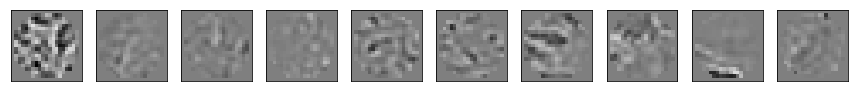

<Figure size 1080x216 with 0 Axes>

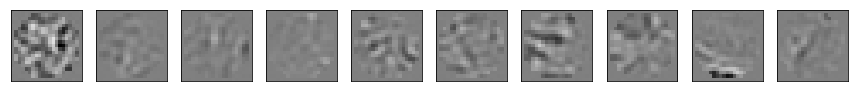

<Figure size 1080x216 with 0 Axes>

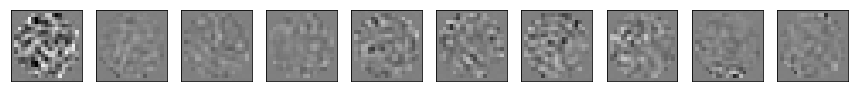

average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.00017245441444396116 +/- 0.003840242486067358
median energy of data =  0.07776151483188877
average energy of data =  0.08862101426382676 +/- 0.05467564162003357
average error =  -0.00017245441444396116 +/- 0.05605213806525559
average energy of residual =  0.04745059154173876 +/- 0.029838117979366696
median energy of residual =  0.04375441993809495
average gain of coding =  1.8966320207481764 +/- 0.45677261112186796
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.0077845948640897725
l0-sparseness of codewords =  0.028887051039697544  ~= l0/M = 0.030245746691871456
average energy of codewords =  0.054166712412251086
std of the average of individual patches =  0.012042393743725344
number of codes, size of reconstructed images =  (256, 441)


<Figure size 1080x216 with 0 Axes>

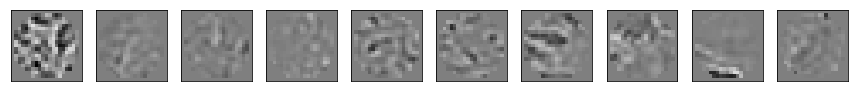

<Figure size 1080x216 with 0 Axes>

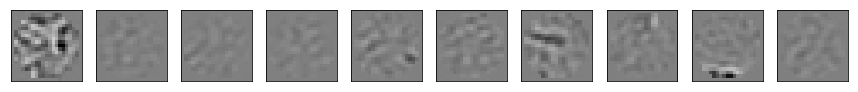

<Figure size 1080x216 with 0 Axes>

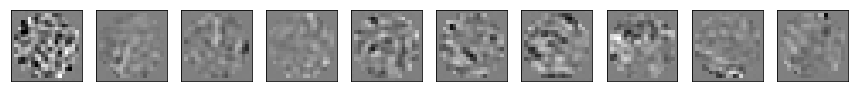

average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.001464252636976437 +/- 0.005692864970163107
median energy of data =  0.07776151483188877
average energy of data =  0.08862101426382676 +/- 0.05467564162003357
average error =  -0.001464252636976437 +/- 0.06990965092643904
average energy of residual =  0.06269060530194291 +/- 0.03097404292819166
median energy of residual =  0.061975724357967145
average gain of coding =  1.39002937090505 +/- 0.29602578004371216
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.01047575159601383
l0-sparseness of codewords =  0.03019405718336484  ~= l0/M = 0.030245746691871456
average energy of codewords =  0.07209548013215301
std of the average of individual patches =  0.005281989610477209
number of codes, 

<Figure size 1080x216 with 0 Axes>

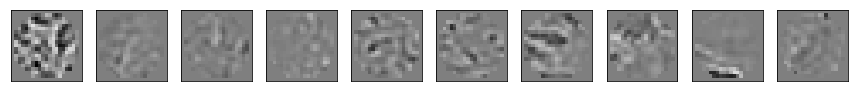

<Figure size 1080x216 with 0 Axes>

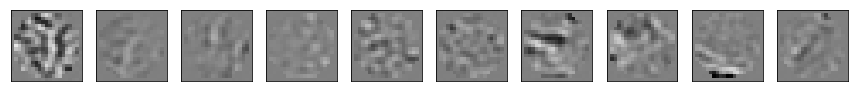

<Figure size 1080x216 with 0 Axes>

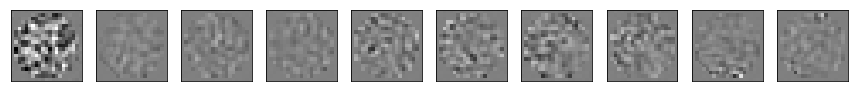

average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.00011492504389785245 +/- 0.003351811406447034
median energy of data =  0.07776151483188877
average energy of data =  0.08862101426382676 +/- 0.05467564162003357
average error =  -0.00011492504389785245 +/- 0.056096273446390524
average energy of residual =  0.04728473730770945 +/- 0.030182092705424587
median energy of residual =  0.04358827367866294
average gain of coding =  1.9096892944167885 +/- 0.4613953200047229
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.01047575159601383
l0-sparseness of codewords =  0.03019405718336484  ~= l0/M = 0.030245746691871456
average energy of codewords =  0.07209548013215301
std of the average of individual patches =  0.005281989610477209
number of codes, size of reconstructed images =  (256, 441)


<Figure size 1080x216 with 0 Axes>

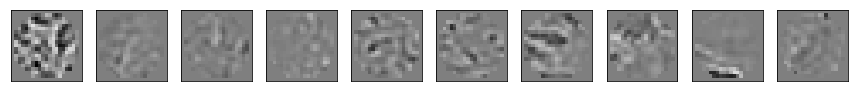

<Figure size 1080x216 with 0 Axes>

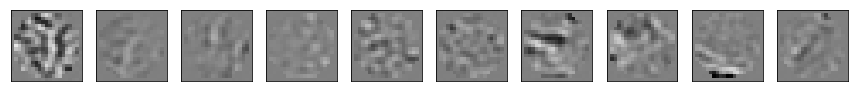

<Figure size 1080x216 with 0 Axes>

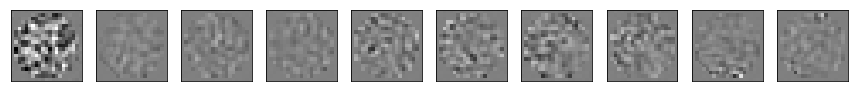

average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.00011492504389785236 +/- 0.003351811406447034
median energy of data =  0.07776151483188877
average energy of data =  0.08862101426382676 +/- 0.05467564162003357
average error =  -0.00011492504389785236 +/- 0.056096273446390524
average energy of residual =  0.04728473730770945 +/- 0.03018209270542459
median energy of residual =  0.04358827367866294
average gain of coding =  1.9096892944167885 +/- 0.4613953200047229
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (256, 529)
average of codewords =  0.00928945027282249
l0-sparseness of codewords =  0.029802693761814745  ~= l0/M = 0.030245746691871456
average energy of codewords =  0.0669364463839015
std of the average of individual patches =  0.007885345530567451
number of codes, size of reconstructed images =  (256, 441)


<Figure size 1080x216 with 0 Axes>

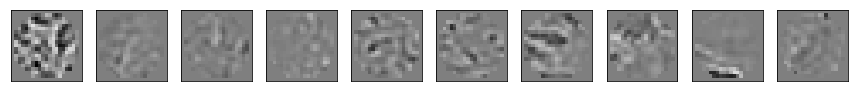

<Figure size 1080x216 with 0 Axes>

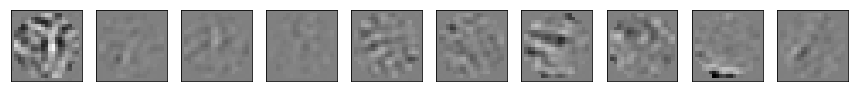

<Figure size 1080x216 with 0 Axes>

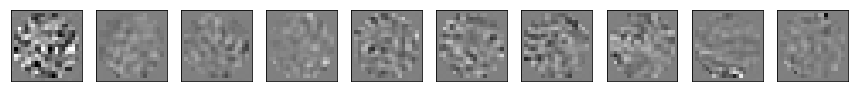

average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.0013181594345995165 +/- 0.005032343106167277
median energy of data =  0.07776151483188877
average energy of data =  0.08862101426382676 +/- 0.05467564162003357
average error =  -0.0013181594345995165 +/- 0.061099082494510196
average energy of residual =  0.05380128388527239 +/- 0.02898719162427288
median energy of residual =  0.05178837803860861
average gain of coding =  1.6239393893324545 +/- 0.36224190243012894


In [8]:
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico_ = dico[homeo_method]
    from shl_scripts.shl_encode import mp
    record_num_batches = 256
    np.random.seed(1973)
    indx = np.random.permutation(data.shape[0])[:record_num_batches]
    #sparse_code = shl.code(data, dico_, matname=matname)
    P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
    #P_cum = dico_.P_cum
    #P_cum = None
    l0_sparseness = 150
    l0_sparseness = shl.l0_sparseness

    for P_cum, gain in zip([None, P_cum_zeroeffect, dico_.P_cum], [np.ones(shl.n_dictionary), None, None]):
        print(50*'🐒')
        sparse_code = mp(data[indx, :], dico_.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)

        print('number of codes, size of codewords = ', sparse_code.shape)
        print('average of codewords = ', sparse_code.mean())
        print('l0-sparseness of codewords = ', (sparse_code>0).mean(), ' ~= l0/M =', shl.l0_sparseness/shl.n_dictionary)
        print('average energy of codewords = ', sparse_code.std(axis=0).mean())
        print('std of the average of individual patches = ', sparse_code.mean(axis=0).std())

        patches = sparse_code @ dico_.dictionary
        print('number of codes, size of reconstructed images = ', patches.shape)

        from shl_scripts.shl_tools import show_data
        max_patches = 10
        fig, axs = show_data(data[indx, :][:max_patches, :])
        plt.show()
        fig, axs = show_data(patches[:max_patches, :])
        plt.show()

        error = (data[indx, :] - patches)
        fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
        plt.show()
        print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
        print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
        SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
        #SD = np.linalg.norm(data[indx, :])/record_num_batches

        print('median energy of data = ', np.median(SD))
        print('average energy of data = ', SD.mean(), '+/-', SD.std())
        #print('total energy of data = ', np.sqrt(np.sum(data**2)))
        #print('total deviation of data = ', np.sum(np.abs(data)))
        print('average error = ', error.mean(), '+/-', error.std())
        SE = np.sqrt(np.mean(error**2, axis=1))
        #SE = np.linalg.norm(error)/record_num_batches

        print('average energy of residual = ', SE.mean(), '+/-', SE.std())
        print('median energy of residual = ', np.median(SE))
        #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
        #print('total deviation of residual = ', np.sum(np.abs(error)))
        print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())

## Quantization of the coefficients

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
total deviation of coefficients =  0.0001486635715039441
total deviation of coefficients =  0.0077845948640897725
total deviation of coefficients =  0.0032522592349440837
average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.0021376943323479975 +/- 0.005869489175323833
median energy of data =  0.13667095936827267
average energy of data =  0.13667095936827267 +/- 0.0
average energy of residual =  0.09671694592973257 +/- 0.0
median energy of residual =  0.09671694592973257
average gain of coding =  1.4131025132614068 +/- 0.0


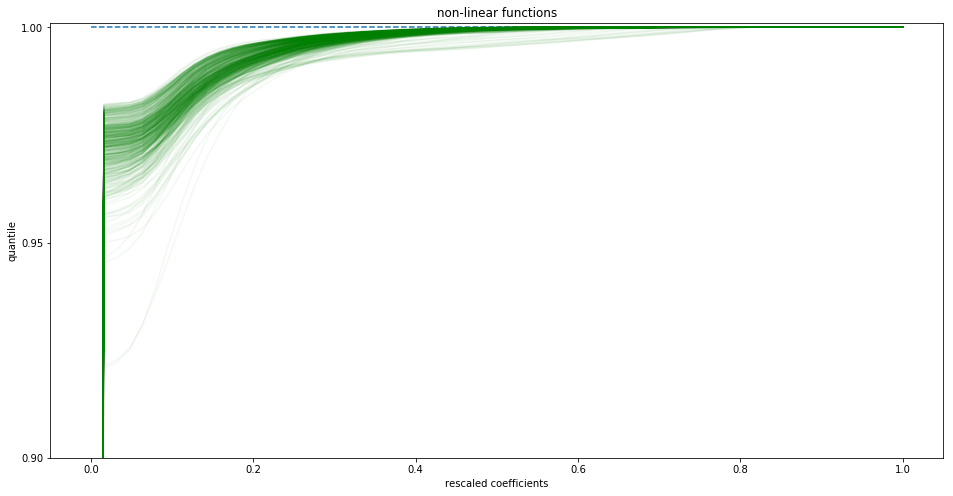

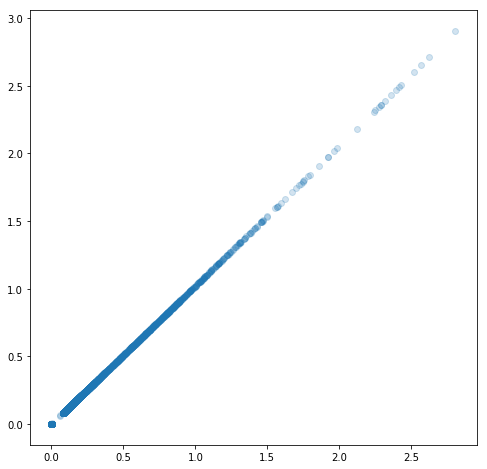

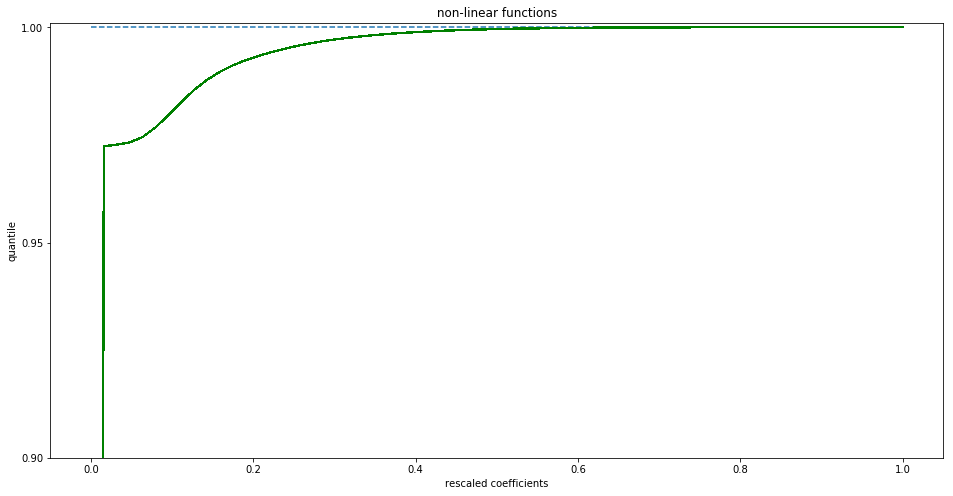

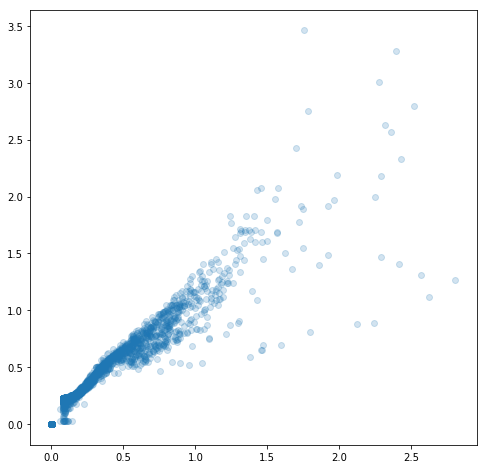

<Figure size 1080x216 with 0 Axes>

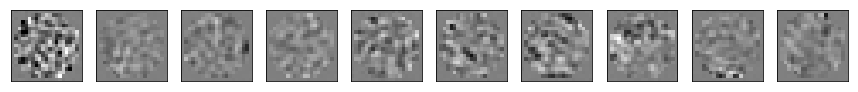

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
total deviation of coefficients =  0.00017683681135957313
total deviation of coefficients =  0.00928945027282249
total deviation of coefficients =  0.0016019120875749963
average of data patches =  -3.539691684302017e-05 +/- 0.007141531008309743
average of residual patches =  -0.0013439759767525095 +/- 0.005377421794269596
median energy of data =  0.13667095936827267
average energy of data =  0.13667095936827267 +/- 0.0
average energy of residual =  0.08371462662845326 +/- 0.0
median energy of residual =  0.08371462662845326
average gain of coding =  1.6325816033899672 +/- 0.0


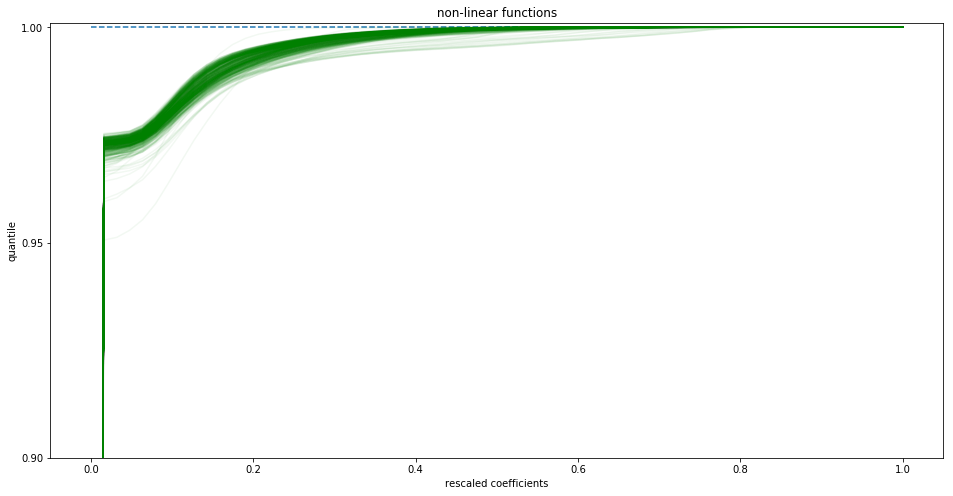

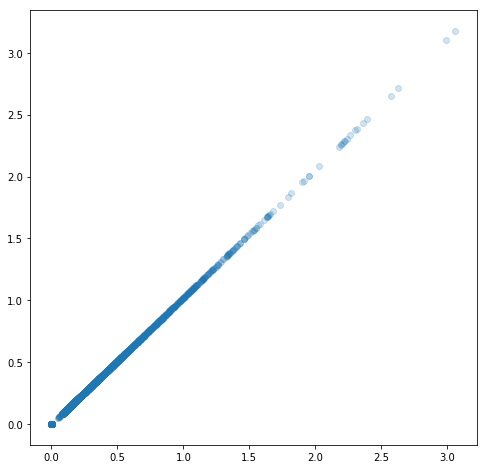

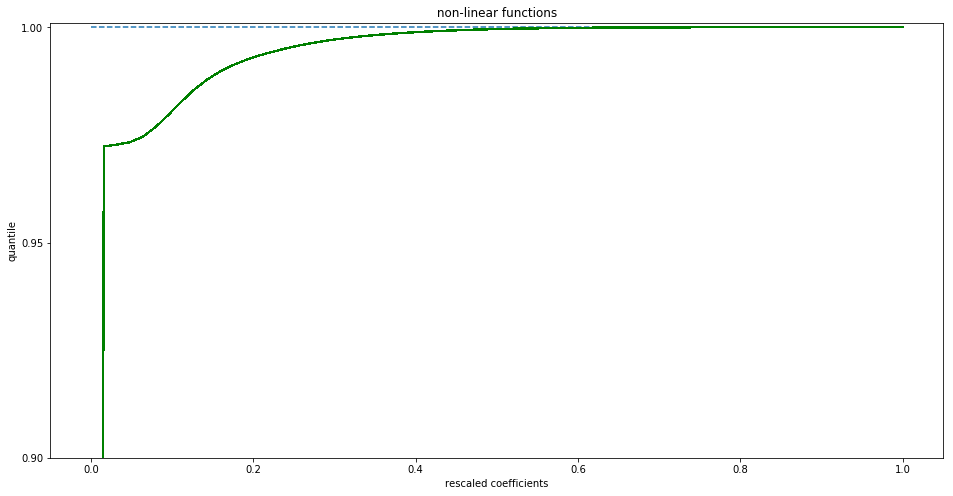

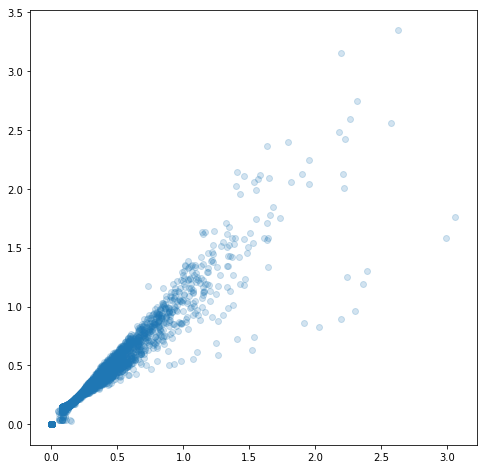

<Figure size 1080x216 with 0 Axes>

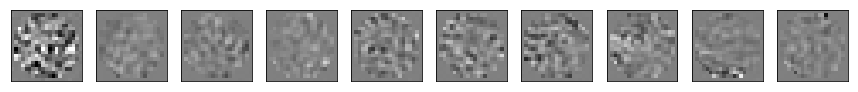

In [9]:
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico_ = dico[homeo_method]
    print(50*'🐒')
    sparse_code = mp(data[indx, :], dico_.dictionary, l0_sparseness=l0_sparseness, P_cum=dico_.P_cum, gain=None)

        
    from shl_scripts.shl_learn import get_P_cum

    P_cum = get_P_cum(sparse_code, C=shl.C, nb_quant=shl.nb_quant)
    P_cum.shape

    P_cum = dico_.P_cum
    P_cum.shape

    from shl_scripts.shl_tools import plot_P_cum
    fig, ax = plot_P_cum(P_cum, ymin=ymin, verbose=False);

    P_cum.shape

    from shl_scripts.shl_encode import quantile, rescaling
    #sparse_code = mp(data, dico.dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum)
    stick = np.arange(shl.n_dictionary)*shl.nb_quant
    q = quantile(P_cum, rescaling(sparse_code, C=shl.C), stick, do_fast=True)

    from shl_scripts.shl_encode import inv_quantile, inv_rescaling
    q_sparse_code = inv_rescaling(inv_quantile(P_cum, q), C=shl.C)
    print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

    P_cum.mean(axis=0).shape

    P_cum_mean = P_cum.mean(axis=0)[np.newaxis, :] * np.ones((shl.n_dictionary, shl.nb_quant))
    fig, ax = plot_P_cum(P_cum_mean, ymin=ymin, verbose=False);

    #q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=shl.C)
    q_sparse_code = inv_rescaling(inv_quantile(P_cum_mean, q), C=shl.C)
    print('total deviation of coefficients = ', np.mean(np.abs(sparse_code)))
    print('total deviation of coefficients = ', np.mean(np.abs(q_sparse_code-sparse_code)))

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(sparse_code.ravel(), q_sparse_code.ravel(), alpha=.2);

    patches = q_sparse_code @ dico_.dictionary
    error = data[indx, :] - patches
    fig, axs = show_data(error[:max_patches, :], cmax=np.max(np.abs(data[:max_patches, :])))
    print('average of data patches = ', data.mean(), '+/-', data.mean(axis=1).std())
    print('average of residual patches = ', error.mean(), '+/-', error.mean(axis=1).std())
    #SD = np.sqrt(np.mean(data[indx, :]**2, axis=1))
    SD = np.linalg.norm(data[indx, :])/record_num_batches
    print('median energy of data = ', np.median(SD))
    print('average energy of data = ', SD.mean(), '+/-', SD.std())
    #print('total energy of data = ', np.sqrt(np.sum(data**2)))
    #print('total deviation of data = ', np.sum(np.abs(data)))
    #SE = np.sqrt(np.mean(error**2, axis=1))
    SE = np.linalg.norm(error)/record_num_batches

    print('average energy of residual = ', SE.mean(), '+/-', SE.std())
    print('median energy of residual = ', np.median(SE))
    #print('total energy of residual = ', np.sqrt(np.sum(error**2)))
    #print('total deviation of residual = ', np.sum(np.abs(error)))
    print('average gain of coding = ', (SD/SE).mean(), '+/-', (SD/SE).std())
    plt.show()

## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.14.1
shl_scripts 20171221
Fri Mar 09 21:31:28 2018 CET